<h1 align=center style="color:black;border: 1px dotted red;">Recipes by ingredients</h1>

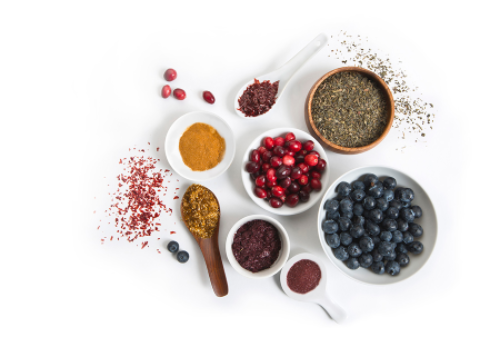

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

sns.set(rc={'figure.figsize':(14,10)})

# Prepare Data

In [ ]:
df = pd.read_csv('../input/cooking-ingredients/train.csv')
df.head()

In [ ]:
# number of ingredients
nr_ingredients = len(df.iloc[:,0])

features = df.iloc[:, 1:nr_ingredients]
labels = df.iloc[:, 0]

nr_ingredients = len(df.columns) - 1
print("Number of igredients: ", nr_ingredients)

In [ ]:
def draw_barplot(x, y, title):
    ax = sns.barplot(x=x, y=y)
    ax.title.set_position([.5, 1.05])
    ax.yaxis.labelpad = 25
    ax.xaxis.labelpad = 25
    ax.set_title(title, fontsize = 20)
    ax.set_ylabel('Ingredients', fontsize = 16)
    ax.set_xlabel('Recipes', fontsize = 16)
    ax.tick_params(labelsize=16)

# Top ingredients

In [ ]:
ingredients_ascending = features.sum().sort_values(ascending=False)

In [ ]:
draw_barplot(x=ingredients_ascending[:20].values, y=ingredients_ascending[:20].keys().values, title="Top used ingredients")

# Average used ingredients

In [ ]:
# get the mean line
mean = ingredients_ascending.mean()

# get the indexes in the range of 5%
idx = np.where((ingredients_ascending.values < (mean + mean * 0.05)) & (ingredients_ascending.values > (mean - mean * 0.05)))[0]

# get the mean ingredients
mean_ingredients = ingredients_ascending.iloc[idx]

In [ ]:
draw_barplot(x=mean_ingredients.values, y=mean_ingredients.keys().values, title="Average used ingredients")

# Less used ingredients

In [ ]:
ingredients_descending = features.sum().sort_values(ascending=True)

In [ ]:
draw_barplot(x=ingredients_descending[:20].values, y=ingredients_descending[:20].keys().values, title="Less used ingredients")

# Receipes with most ingredients

In [ ]:
top_ten_idx = list(features.sum(axis=1).sort_values(ascending=False).index)[:10]

In [ ]:
print("Receipes with most ingredients:")
for i,recipe in enumerate(labels[top_ten_idx].values):
    print('{0}. {1}'.format(i + 1, recipe))

In [ ]:
def get_most_frequent_ingredients(df, nr):
    idxes = []
    for nr in range(len(df)):
        arr = np.where(df == 1.0)
        nr_idx = np.where(arr[0] == nr)[0]
        ids = arr[1][nr_idx]
        idxes.append(ids)

    flat_idxes = np.concatenate(idxes)
    count = Counter(flat_idxes)
    freqs = np.array([[freq[0], freq[1]] for freq in count.most_common(nr)])
    return idxes, freqs

In [ ]:
freq_idxes, frequencies = get_most_frequent_ingredients(features.iloc[top_ten_idx], 5)

In [ ]:
x = np.arange(len(labels[frequencies[:,0]].values))
y = frequencies[:,1]
hue = features.columns[frequencies[:, 0]]

In [ ]:
ax = sns.barplot(x=x, y=y, hue=hue)
ax.title.set_position([.5, 1.05])
ax.yaxis.labelpad = 25
ax.xaxis.labelpad = 25
ax.set_title('Most frequent ingredients', fontsize = 20)
ax.set_ylabel('Frequency', fontsize = 16)
ax.set_xlabel('Recipes', fontsize = 16)
ax.tick_params(labelsize=16)

# Analysis for most ingredient recipe
**Recipe**: Crab Cake Benedict with Old Bay Hollandaise on Johnnycakes

In [ ]:
ingredients = features.columns.values[np.where(features.iloc[top_ten_idx[0]] == 1.0)[0]]

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))

data = np.arange(len(ingredients))
ingredients = ingredients


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

legend = ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          fontsize=15,
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(legend.get_title(),fontsize=15, weight="bold")

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Crab Cake Benedict with Old Bay Hollandaise on Johnnycakes", fontsize=15, weight="bold")

plt.show()